# Trucs et astuces plus avancés en numpy

## Fonction de recherche `np.where`

Rechercher des valeurs et sélectionner des portions de matrices est un exercice récurrent en sciences des données. Apprenons à le faire de différentes manières.

In [ ]:
import numpy as np

In [ ]:
a = np.random.randn(100,2)
#print(a)
# element de la matrice complète < 0.5
index = np.where(a<0.5) # retourne les indices dans (I,J)
                        # I: indice des lignes
                        # J: indice des colonnes
#print(index)
# recherche dans une colonne
index2 = np.where(a[:,0]<0.5)
print(index2)
# ajouter des print pour comprendre les entrées/sorties!

**Attention au type de retour**

Le type de `index` est sans surprise... Mais celui de `index2` est plus déroutant: il s'agit d'un tuple mais avec un seul champ rempli...
Pour utiliser les indices extraits facilement, il faut donc faire:

In [ ]:
index2, = np.where(a[:,0]<0.5) # on ne s'intéresse qu'au premier membre retourné!
# a[index2,:] = ...

## Fonction de recherche en syntaxe légère


In [ ]:
y = np.array([-1, -1, -1, 1, 1, 1])
x = np.random.rand(6,2)

print(y==-1)

# sélection des 3 premières lignes de x
print(x)
print(y)
print(x[y==-1])

# contraintes logiques: 
#    - x et y doivent avoir la même taille
#    - y doit être un vecteur

# sélection des lignes de x qui commencent par un nombre > 0.5
#print(x[x[:,0]>0.5])


In [ ]:
# TODO : vérifier les dimension de la sélection, vérifier quelles lignes ont été sélectionnée avec des print



## Transformation de matrice

`np.where` permet de renvoyer une matrice transformée en ajoutant des arguments dans la méthode

> `np.where(m > alpha, retour_si_vrai, retour_si_faux)`

On peut se servir de cette syntaxe pour faire des comptages

In [ ]:
a = np.random.randn(100,2)
# Mettre à zeros tous les éléments négatifs:
b = np.where(a<0., 0., a)    # (clause, TODO if true, TODO if false)
c = np.where(a<0., -1., 1.)  # Extraire le signe des éléments de a

nb_elem_pos = np.where(a>0., 1, 0).sum() # construction d'une matrice binaire + somme = comptage

## ATTENTION aux doubles clauses

il y a un piège dans la priorité donnée aux opérations: il faut ajouter des parenthèses

In [ ]:
# pour l'estimation d'une loi jointe entre a et b
N = 100
a = np.ceil(np.random.rand(N) * 10)   # entre 1 et 10
b = np.round(np.random.rand(N))       # 0 ou 1
np.where((a == 4) & (b==0), 1., 0.)   # OK
# np.where( a == 4  &  b==0 , 1., 0.) # KO !!! => le & est prioritaire sur le == !!!

# <span style="color:red"> EXO Exercice basique </span>

Générer 1000 tirages selon une loi normale centrée réduite
 - Vérifier par comptage que la moitié (environ) des tirages est supérieure à 0
 - Vérifier que 2/3 des tirages sont compris entre entre moins l'écart-type et plus l'écart type

# <span style="color:red"> EXO Comptage des erreurs </span>

Soit $\mathbf y\in \{0,1\}^n$ les étiquettes associées à $n$ données et $\mathbf yhat\in \{0,1\}^n$ les sorties de votre modèle, calculer le taux de bonne classification de votre approche.

$$Y = \begin{pmatrix} y_0\\ \vdots \\ y_n \end{pmatrix} \qquad  \hat Y = \begin{pmatrix} \hat y_0\\ \vdots \\\hat y_n \end{pmatrix} \Rightarrow \text{Combien de valeurs en commun dans les deux vecteurs?}
                 $$


Note: avant de chercher la réponse à la question, essayer de bien comprendre comment ont été générées les données, les appels de fonction ne sont pas triviaux.

In [ ]:
# generation arbitraire des données et des sorties
n = 100
y = np.ones(n)
y[:n//2] = 0

yhat = y.copy()
yhat = np.where(np.random.random(n)<0.1, 1-yhat, yhat) # corruption de y par une bernoulli de paramètre 0.1

# calculer le taux de bonne classification


# <span style="color:red"> EXO Statistiques par classes </span>

Soit des données classiques en machine learning associant $n$ observations en 2 dimensions $X$ et une supervision $Y$ indiquant la classe de chaque point:

$$X = \begin{pmatrix}
                x_{0,0}& x_{0,1} \\
                \vdots & \vdots\\
                x_{n,0} & x_{n,1} 
                \end{pmatrix}, \qquad  Y = \begin{pmatrix} y_0\\ \vdots \\ y_n \end{pmatrix}
                 $$

Ces données sont représentées sur la figure ci-dessous (chaque ligne de la matrice $X$ correspond à un point de la figure):

<img src="ressources/gauss.png">

La boite suivante permet de charger les données, vous répondrez ensuite aux questions suivantes:

1. Compter les données
1. Quels sont les codes utilisés pour les deux classes?
1. Quelles sont les moyennes de chacune des deux classes (sans boucle `for`)?
1. Quelles sont les valeurs mini et maxi sur chaque dimension de chacune des deux classes (toujours sans boucle `for`)?

In [9]:
import pickle as pkl
# récupération des données:
data = pkl.load(open("ressources/gauss.pkl", "rb"))

X,Y= data['X'],data['Y']

# Annexe (inutile pour le TP)

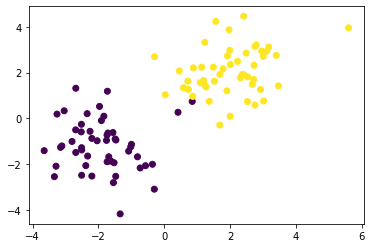

In [10]:

import sklearn.datasets as data
import matplotlib.pyplot as plt
import pickle as pkl

X,Y = data.make_blobs(100, centers=[[-2, -1], [2, 2]])

pkl.dump({'X':X,'Y':Y}, open("ressources/gauss.pkl","wb"))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y)
plt.savefig('ressources/gauss.png', facecolor='white')